Importing Required Libraries

In [3]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Load Dataset

In [4]:
# Load dataset
data = pd.read_csv('wind_data.csv')

# Parse 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Sort by date just to be safe
data = data.sort_values('Date').reset_index(drop=True)

# Show top 5 rows
print("Sample Data:")
print(data.head())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Sample Data:
        Date   MeanTemp   Humidity  WindSpeed  MeanPressure
0 2017-01-01  15.913043  85.869565   2.743478     59.000000
1 2017-01-02  18.500000  77.222222   2.894444   1018.277778
2 2017-01-03  17.111111  81.888889   4.016667   1018.333333
3 2017-01-04  18.700000  70.050000   4.545000   1015.700000
4 2017-01-05  18.388889  74.944444   3.300000   1014.333333

Missing Values:
Date            0
MeanTemp        0
Humidity        0
WindSpeed       0
MeanPressure    0
dtype: int64


Explore and Understand Data

In [5]:
# Check Dataset Dimensions
print("Dataset Shape:", data.shape)

# Check Column Types
print("\nColumn Data Types:\n", data.dtypes)

# Check for any duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Describe numerical features
print("\nSummary Statistics:")
print(data.describe())

# Feature Engineering: Extract date parts
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Final dataset preview
print("\nData after feature engineering:")
print(data.head())


Dataset Shape: (114, 5)

Column Data Types:
 Date            datetime64[ns]
MeanTemp               float64
Humidity               float64
WindSpeed              float64
MeanPressure           float64
dtype: object

Number of duplicate rows: 0

Summary Statistics:
                      Date    MeanTemp    Humidity   WindSpeed  MeanPressure
count                  114  114.000000  114.000000  114.000000    114.000000
mean   2017-02-26 12:00:00   21.713079   56.258362    8.143924   1004.035090
min    2017-01-01 00:00:00   11.000000   17.750000    1.387500     59.000000
25%    2017-01-29 06:00:00   16.437198   39.625000    5.563542   1007.437500
50%    2017-02-26 12:00:00   19.875000   57.750000    8.069444   1012.739316
75%    2017-03-26 18:00:00   27.705357   71.902778   10.068750   1016.739583
max    2017-04-24 00:00:00   34.500000   95.833333   19.314286   1022.809524
std                    NaN    6.360072   19.068083    3.588049     89.474692

Data after feature engineering:
        Da

Preview Data

In [6]:
# Preview the Dataset
data.head()

,Date,MeanTemp,Humidity,WindSpeed,MeanPressure,Year,Month,Day,DayOfWeek
0,2017-01-01,15.913043,85.869565,2.743478,59.000000,2017,1,1,6
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778,2017,1,2,0
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333,2017,1,3,1
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000,2017,1,4,2
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333,2017,1,5,3


Data Types and Missing values

In [7]:
#Data Types and Missing Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          114 non-null    datetime64[ns]
 1   MeanTemp      114 non-null    float64       
 2   Humidity      114 non-null    float64       
 3   WindSpeed     114 non-null    float64       
 4   MeanPressure  114 non-null    float64       
 5   Year          114 non-null    int32         
 6   Month         114 non-null    int32         
 7   Day           114 non-null    int32         
 8   DayOfWeek     114 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(4)
memory usage: 6.4 KB


Checking missing values

In [8]:
# Check for missing values in the full dataset
data.isnull().sum()

Date            0
MeanTemp        0
Humidity        0
WindSpeed       0
MeanPressure    0
Year            0
Month           0
Day             0
DayOfWeek       0
dtype: int64

Checking if any outliers are present

In [9]:

# Detecting outliers using IQR method
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data[col] < (Q1 - 1.5 * IQR)) | (data[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"Number of outliers in {col}: {outliers}")


NameError: name 'numeric_cols' is not defined

Removing Duplicates

In [ ]:
# Drop duplicate rows, if any
initial_shape = data.shape
data = data.drop_duplicates()
final_shape = data.shape

print(f"Duplicates removed: {initial_shape[0] - final_shape[0]}")

Duplicates removed: 0


Filling missing values

In [ ]:
# Fill missing values
data = data.dropna()

print("Missing values after cleansing:")
print(data.isnull().sum())

Missing values after cleansing:
Date            0
MeanTemp        0
Humidity        0
WindSpeed       0
MeanPressure    0
Year            0
Month           0
Day             0
DayOfWeek       0
dtype: int64


Data cleansing

In [ ]:
# Recreate features (in case data was changed)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

# Final preview
print("\nCleaned Data Preview:")
print(data.head())


# Redefine features and target after cleaning
feature_cols = ['Humidity', 'MeanTemp', 'MeanPressure', 'Year', 'Month', 'Day', 'DayOfWeek']
target_col = 'WindSpeed'

X = data[feature_cols]
y = data[target_col]

# Re-split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)



Cleaned Data Preview:
        Date   MeanTemp   Humidity  WindSpeed  MeanPressure  Year  Month  Day  \
0 2017-01-01  15.913043  85.869565   2.743478     59.000000  2017      1    1   
1 2017-01-02  18.500000  77.222222   2.894444   1018.277778  2017      1    2   
2 2017-01-03  17.111111  81.888889   4.016667   1018.333333  2017      1    3   
3 2017-01-04  18.700000  70.050000   4.545000   1015.700000  2017      1    4   
4 2017-01-05  18.388889  74.944444   3.300000   1014.333333  2017      1    5   

   DayOfWeek  
0          6  
1          0  
2          1  
3          2  
4          3  
Training Set Shape: (91, 7)
Testing Set Shape: (23, 7)


Convert count columns into numeric (if they are in string format)

In [ ]:
# Check for object-type columns (likely to be strings)
print("Object-type columns:")
print(data.select_dtypes(include='object').columns)

# Convert numeric-looking string columns to numeric
for col in data.select_dtypes(include='object').columns:
    try:
        data[col] = pd.to_numeric(data[col])
        print(f"Converted column '{col}' to numeric.")
    except ValueError:
        print(f"Skipped column '{col}' — not purely numeric.")

# Confirm data types after conversion
print("\nUpdated Data Types:")
print(data.dtypes)


Object-type columns:
Index([], dtype='object')

Updated Data Types:
Date            datetime64[ns]
MeanTemp               float64
Humidity               float64
WindSpeed              float64
MeanPressure           float64
Year                     int32
Month                    int32
Day                      int32
DayOfWeek                int32
dtype: object


Data Visualization

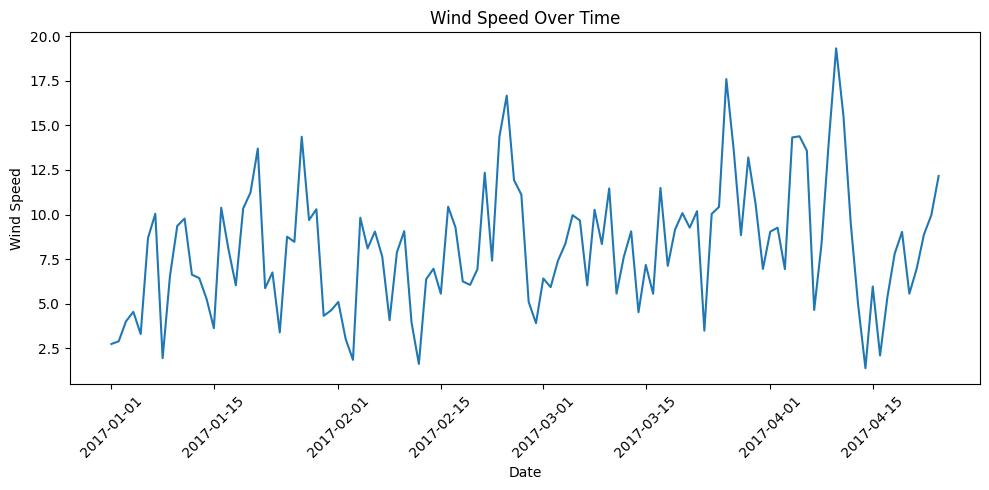

In [ ]:
# 1. Wind Speed over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='Date', y='WindSpeed')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Correlation Heatmap

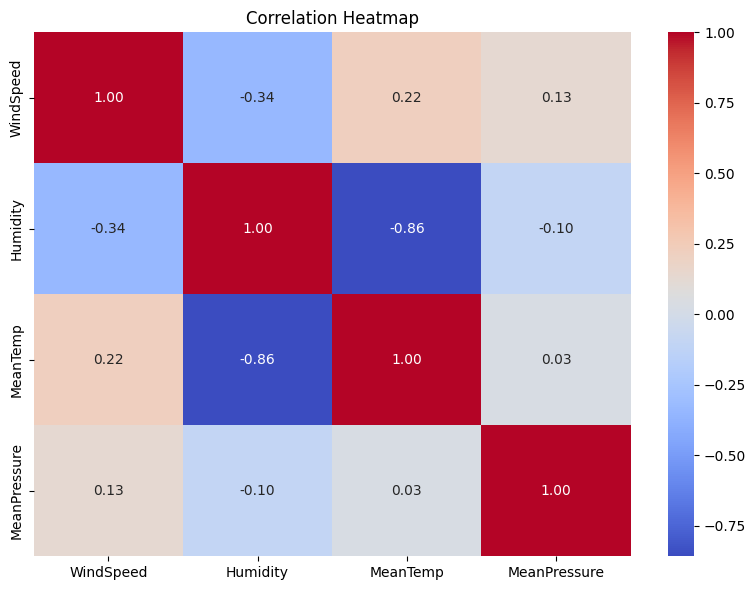

In [ ]:
# 2. Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[['WindSpeed', 'Humidity', 'MeanTemp', 'MeanPressure']].corr(), 
            annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

Distribution of Wind Speed

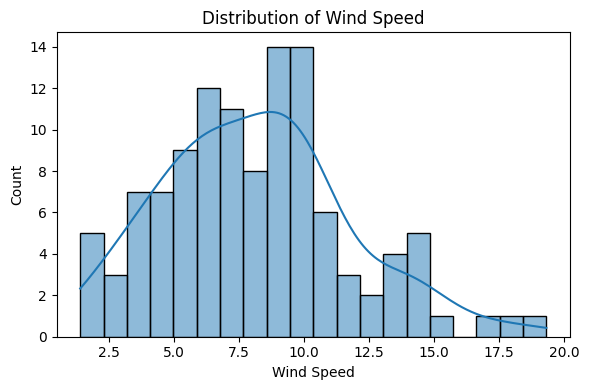

In [ ]:
# 3. Histogram of Wind Speed
plt.figure(figsize=(6, 4))
sns.histplot(data['WindSpeed'], bins=20, kde=True)
plt.title('Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.tight_layout()
plt.show()

Wind Speed by Month

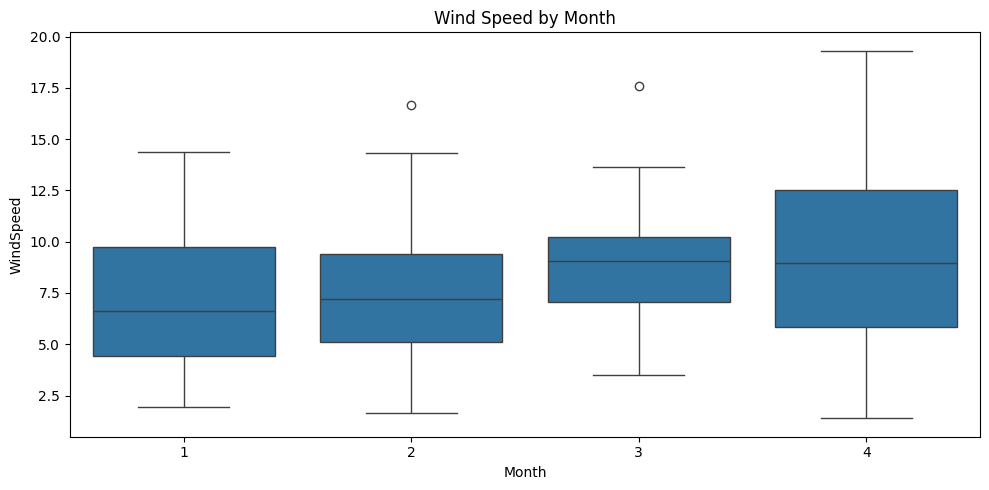

In [ ]:
# 4. Boxplot of Wind Speed by Month
plt.figure(figsize=(10, 5))
sns.boxplot(x='Month', y='WindSpeed', data=data)
plt.title('Wind Speed by Month')
plt.tight_layout()
plt.show()


Relation between Wind Speed and Humidity

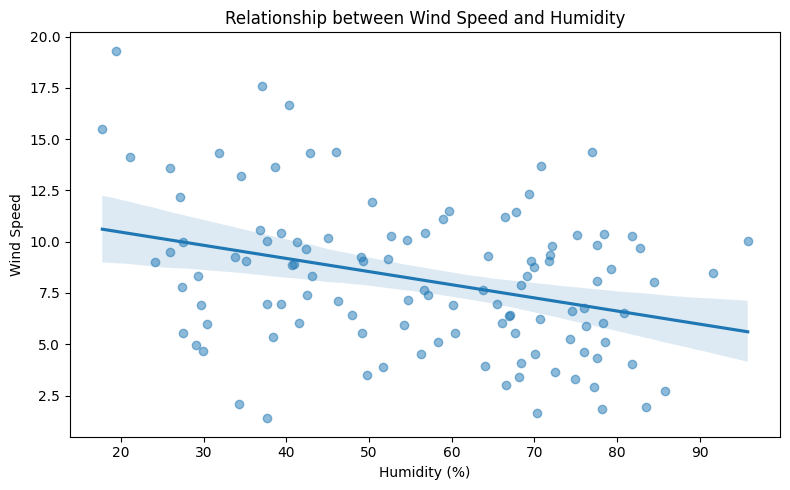

In [ ]:
# Scatter plot with regression line
plt.figure(figsize=(8, 5))
sns.regplot(x='Humidity', y='WindSpeed', data=data, scatter_kws={'alpha':0.5})
plt.title('Relationship between Wind Speed and Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Wind Speed')
plt.tight_layout()
plt.show()

Model Selection (Random Forest Regressor)

In [ ]:
# Initialize Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Save the trained model as a .pkl file
joblib.dump(rf_model, 'wind_speed_rf_model.pkl')

print("✅ Model trained and saved as 'wind_speed_rf_model.pkl'")


✅ Model trained and saved as 'wind_speed_rf_model.pkl'


Model Evaluation

In [ ]:
# Predict on test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"📊 Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


📊 Model Evaluation:
Mean Absolute Error (MAE): 2.61
Mean Squared Error (MSE): 10.00
Root Mean Squared Error (RMSE): 3.16
R² Score: 0.22


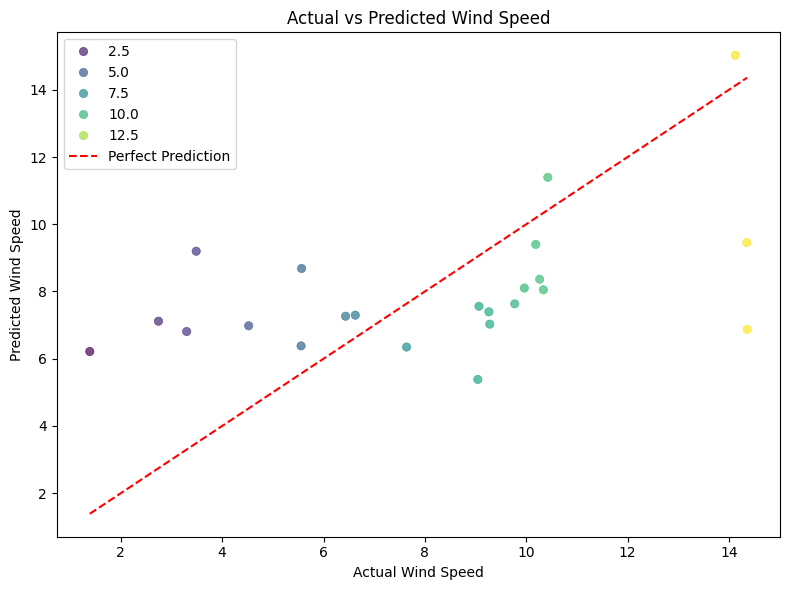

In [ ]:
#Plot actual vs predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, hue=y_test, palette='viridis', alpha=0.7, edgecolor=None)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')

plt.xlabel('Actual Wind Speed')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs Predicted Wind Speed')
plt.legend()
plt.tight_layout()
plt.show()

Feature Importance Plot

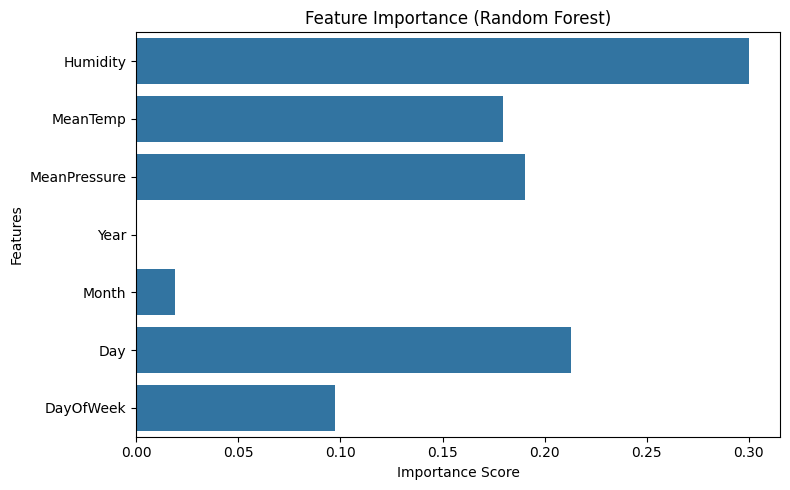

In [ ]:
# Feature importance from Random Forest
importances = rf_model.feature_importances_
feat_names = X.columns

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feat_names)
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


 Forecasting Future Wind Speed (Basic Simulation)

In [ ]:
# Number of future days to predict
n_days = 7

# Get last available date
last_date = data['Date'].max()

# Create future date range
future_dates = [last_date + pd.Timedelta(days=i) for i in range(1, n_days + 1)]

# Option 1: Use average values of features for future (safe if we don't know real future inputs)
avg_values = data[['Humidity', 'MeanTemp', 'MeanPressure']].mean()

# Create future DataFrame with simulated inputs
future_df = pd.DataFrame({
    'Date': future_dates,
    'Humidity': avg_values['Humidity'],
    'MeanTemp': avg_values['MeanTemp'],
    'MeanPressure': avg_values['MeanPressure']
})

# Feature engineering (same as before)
future_df['Year'] = pd.to_datetime(future_df['Date']).dt.year
future_df['Month'] = pd.to_datetime(future_df['Date']).dt.month
future_df['Day'] = pd.to_datetime(future_df['Date']).dt.day
future_df['DayOfWeek'] = pd.to_datetime(future_df['Date']).dt.dayofweek

# Arrange feature columns
future_X = future_df[['Humidity', 'MeanTemp', 'MeanPressure', 'Year', 'Month', 'Day', 'DayOfWeek']]

# Predict wind speed
future_predictions = rf_model.predict(future_X)

# Add predictions to future_df
future_df['Predicted_WindSpeed'] = future_predictions

# Show future forecast
print("📈 Forecasted Wind Speed for Next 7 Days:")
print(future_df[['Date', 'Predicted_WindSpeed']])


📈 Forecasted Wind Speed for Next 7 Days:
        Date  Predicted_WindSpeed
0 2017-04-25             9.386812
1 2017-04-26             9.691322
2 2017-04-27             8.930491
3 2017-04-28             9.221470
4 2017-04-29             9.348073
5 2017-04-30             8.954213
6 2017-05-01             8.224541


Final Model Testing and Save the Model

In [ ]:
# Final prediction on test set (to confirm)
final_predictions = rf_model.predict(X_test)

# Recalculate metrics
final_mae = mean_absolute_error(y_test, final_predictions)
final_rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
final_r2 = r2_score(y_test, final_predictions)

# Print final evaluation
print("✅ Final Model Evaluation:")
print(f"Mean Absolute Error (MAE): {final_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {final_rmse:.2f}")
print(f"R² Score: {final_r2:.2f}")

# Save the final trained model to a .pkl file
joblib.dump(rf_model, 'final_wind_speed_model.pkl')

print("✅ Final model saved as 'final_wind_speed_model.pkl'")

✅ Final Model Evaluation:
Mean Absolute Error (MAE): 2.61
Root Mean Squared Error (RMSE): 3.16
R² Score: 0.22
✅ Final model saved as 'final_wind_speed_model.pkl'


Load the Model from File

In [ ]:
# Load the saved model from .pkl file
loaded_model = joblib.load('final_wind_speed_model.pkl')

print("✅ Model loaded successfully from 'final_wind_speed_model.pkl'")


✅ Model loaded successfully from 'final_wind_speed_model.pkl'
